<a href="https://colab.research.google.com/github/SpyroRock/U-net-reconstruction/blob/master/Reconstrunction_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/SpyroRock/U-net-reconstruction
%cd U-net-reconstruction

Cloning into 'U-net-reconstruction'...
remote: Enumerating objects: 213, done.
remote: Counting objects: 100% (77/77), done.
remote: Compressing objects: 100% (60/60), done.
remote: Total 213 (delta 36), reused 48 (delta 17), pack-reused 136
Receiving objects: 100% (213/213), 226.79 MiB | 23.59 MiB/s, done.
Resolving deltas: 100% (108/108), done.
/content/U-net-reconstruction


In [ ]:
!pip install -r requirements.txt

     |████████████████████████████████| 92.6MB 95kB/s 
     |████████████████████████████████| 317kB 45.8MB/s 
     |████████████████████████████████| 368kB 47.2MB/s 
     |████████████████████████████████| 51kB 9.1MB/s 
     |████████████████████████████████| 3.2MB 45.1MB/s 
     |████████████████████████████████| 3.3MB 37.2MB/s 
  Created wheel for keras-segmentation: filename=keras_segmentation-0.3.0-cp37-none-any.whl size=29072 sha256=4cfa24053fa86f8764090dbbcacea6b56be9e2dd142720fec68f490d51b469a6
  Stored in directory: /root/.cache/pip/wheels/d0/bb/c0/6aad88b38f6e46db048bed4cccb904a5897055a8ab6fbd4dfc
Successfully built keras-segmentation
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Found existing installation: tensorboard 2.4.1
    Uninstalling t

In [ ]:
%cd /content/U-net-reconstruction/

/content/U-net-reconstruction


In [ ]:
from model_structure import create_model
from U_net_mix import unet_model
from unet_model_construction import get_unet
import keras
from keras.models import Model
from keras.layers import Input
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras import backend as K
from keras.callbacks import ModelCheckpoint, EarlyStopping
import numpy as np
from numpy import load, save
from sklearn.model_selection import train_test_split
import pickle

Using TensorFlow backend.
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarn

In [ ]:
img_height = 128
img_width = 128

img_height_test = 128
img_width_test = 128

speckle_data = load('speckle_array_case0.npy')
print(speckle_data.shape)

speckle_labels = load('symbol_array_case0.npy')
print(speckle_labels.shape)

(258, 128, 128)
(258, 128, 128)


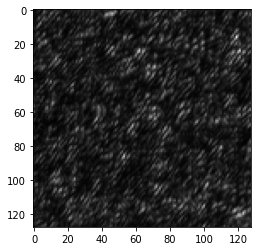

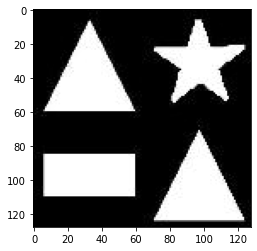

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(speckle_data, speckle_labels, test_size=0.1, random_state=42)

plt.imshow(X_train[0], cmap='gray')
plt.show()
plt.imshow(y_train[0], cmap='gray')
plt.show()

X_train = X_train.reshape(-1, img_height, img_width, 1)
X_test = X_test.reshape(-1, img_height, img_width, 1)
input_shape = (img_height, img_width, 1)

y_train = y_train.reshape(-1, img_height_test, img_width_test, 1)
y_test = y_test.reshape(-1, img_height_test, img_width_test, 1)
input_shape_test = (img_height_test, img_width_test, 1)

In [ ]:
config = tf.ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.Session(config=config)

reconstruction = get_unet(input_shape, n_filters = 16, dropout = 0.1, batchnorm = True)



# define the checkpoint
filepath = "/content/U-net-reconstruction/best_model.h5"
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
mc = ModelCheckpoint(filepath, monitor='val_acc', mode='max', verbose=1, save_best_only=True)
callbacks_list = [es, mc]


reconstruction.fit(X_train, y_train, 
                   batch_size = 10, 
                   epochs = 200, 
                   verbose = 1, 
                   validation_data = (X_test, y_test),
                   callbacks=callbacks_list) # Data on which to evaluate the loss and any model metrics at the end of each epoch. 
                                                       # The model will not be trained on this data. 
                                                       # This could be a list (x_val, y_val) or a list (x_val, y_val, val_sample_weights). 
                                                       # validation_data will override validation_split.

score = reconstruction.evaluate(X_test, y_test, verbose = 0)

print('Test loss:', score[0])
print('Test acuracy:', score[1]) 

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 128, 128, 1)  0                                            
__________________________________________________________________________________________________
conv2d_59 (Conv2D)              (None, 128, 128, 16) 160         input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_56 (BatchNo (None, 128, 128, 16) 64          conv2d_59[0][0]                  
__________________________________________________________________________________________________
activation_56 (Activation)      (None, 128, 128, 16) 0           batch_normalization_56[0][0]     
__________________________________________________________________________________________________
max_poolin

/usr/local/lib/python3.7/dist-packages/keras/callbacks.py:434: RuntimeWarning: Can save best model only with val_accuracy available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


 50/232 [=====>........................] - ETA: 29s - loss: -5.3789 - acc: 0.2391

KeyboardInterrupt: ignored

In [ ]:
# load the model
#new_model = load_model(filepath)
#assert_allclose(model.predict(X_train),new_model.predict(X_train), 1e-5)
#score = reconstruction.evaluate(X_test, y_test, verbose = 0)
#checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='min')
#checkpoint.best = score # <== ****THIS IS THE KEY **** See source for  ModelCheckpoint

# fit the model
#callbacks_list = [checkpoint]
#new_model.fit(X_train, y_train, epochs=5, batch_size=50, callbacks=callbacks_list)